In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import jax.numpy as jnp
from jax import vmap
import matplotlib.pyplot as plt
from matplotlib. collections import PatchCollection
import sys 
# sys.path.append('../')

from build_solver import build_erg_time_opt_solver

In [2]:
args = {
    'N' : 800, 
    'x0' : np.array([2.0, 2.2])*1,
    'xf' : np.array([98.8, 92.0])*1,
    'erg_ub' : 0.0001,
    'alpha' : 0.9,
    'wrksp_bnds' : np.array([[0.,100.],[0.,100.]])
}

In [3]:
solver, obs = build_erg_time_opt_solver(args)
solver.solve(max_iter=20_000, eps=1e-7, alpha=1.00001)

I0000 00:00:1703824118.612126       1 tfrt_cpu_pjrt_client.cc:349] TfrtCpuClient created.


unsuccessful, tol:  0.014404297


In [32]:
solver.solve(max_iter=10, eps=1e-7, alpha=1.00001)

unsuccessful, tol:  0.0015182495


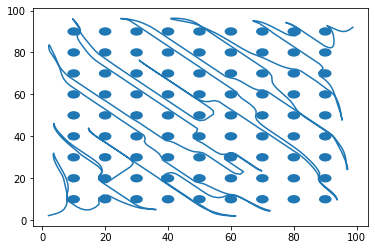

In [4]:
sol = solver.get_solution()

fig, ax = plt.subplots() 

ax.plot(sol['x'][:,0], sol['x'][:,1])
patches = []
for ob in obs: 
    circ = ob.draw()
    patches.append(circ)

ax.add_collection(PatchCollection(patches))


In [37]:
sol['tf']

Array(16.75511, dtype=float32, weak_type=True)